In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image #for the imageDataGEnerator function

In [1]:
#defining datasets path
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [3]:
# CNN Based Model in Keras
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))#pooling layer
model.add(Dropout(0.25))#dropout

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [4]:
#Getting parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

# Data Augmentation

In [8]:
#for train data
train_datagen =image.ImageDataGenerator(
    rescale=1./255,  # normalize pixel values between 0-1
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True # horizontal transposition
)
#for test data
test_datagen=image.ImageDataGenerator(
    rescale=1./255
)

In [9]:
# creating training set 
train_generator=train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)



Found 224 images belonging to 2 classes.


In [19]:
train_generator.class_indices 

{'Covid': 0, 'Normal': 1}

In [10]:
#creating validation set
validation_generator=test_datagen.flow_from_directory(
    'CovidDataset/Val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 60 images belonging to 2 classes.


In [16]:
#Training the model
hist=model.fit_generator(
    train_generator,
    steps_per_epoch=7,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=2
)

Epoch 1/10
7/7 [==============================] - 112s 13s/step - loss: 0.4173 - accuracy: 0.8214 - val_loss: 0.2533 - val_accuracy: 0.9500
Epoch 2/10
7/7 [==============================] - 63s 9s/step - loss: 0.3873 - accuracy: 0.8661 - val_loss: 0.3188 - val_accuracy: 0.9833
Epoch 3/10
7/7 [==============================] - 67s 9s/step - loss: 0.3169 - accuracy: 0.9018 - val_loss: 0.1997 - val_accuracy: 0.9667
Epoch 4/10
7/7 [==============================] - 67s 10s/step - loss: 0.3048 - accuracy: 0.8884 - val_loss: 0.1494 - val_accuracy: 0.9833
Epoch 5/10
7/7 [==============================] - 70s 10s/step - loss: 0.2835 - accuracy: 0.8795 - val_loss: 0.0896 - val_accuracy: 0.9833
Epoch 6/10
7/7 [==============================] - 69s 10s/step - loss: 0.2252 - accuracy: 0.8973 - val_loss: 0.1584 - val_accuracy: 0.9833
Epoch 7/10
7/7 [==============================] - 69s 10s/step - loss: 0.2601 - accuracy: 0.8884 - val_loss: 0.1191 - val_accuracy: 0.9833
Epoch 8/10
7/7 [============

In [17]:
#Getting summary
summary=hist.history
print(summary)

{'loss': [0.41727617383003235, 0.3872545659542084, 0.3169087767601013, 0.3047504425048828, 0.2834984362125397, 0.22520561516284943, 0.260092169046402, 0.2848369777202606, 0.2385338395833969, 0.2647802531719208], 'accuracy': [0.8214285969734192, 0.8660714030265808, 0.9017857313156128, 0.8883928656578064, 0.8794642686843872, 0.8973214030265808, 0.8883928656578064, 0.8973214030265808, 0.9151785969734192, 0.9241071343421936], 'val_loss': [0.2533113956451416, 0.31881967186927795, 0.1997343897819519, 0.14941520988941193, 0.08961227536201477, 0.15843413770198822, 0.11910177767276764, 0.07623574137687683, 0.13360793888568878, 0.08164048194885254], 'val_accuracy': [0.949999988079071, 0.9833333492279053, 0.9666666388511658, 0.9833333492279053, 0.9833333492279053, 0.9833333492279053, 0.9833333492279053, 1.0, 0.9666666388511658, 0.9833333492279053]}


In [57]:
_, acc = model.evaluate_generator(validation_generator, steps=len(validation_generator), verbose=0)
print('%.3f' % (acc * 100.0))

98.333


# Confusion Matrix

In [69]:
y_actual, y_test = [],[]

In [75]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
    img=image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)#Along row expansion
    pred=model.predict_classes(img)
    y_test=np.append(y_test,pred[0,0])
    y_actual=np.append(y_actual,1)

In [76]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
    img=image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    pred=model.predict_classes(img)
    y_test=np.append(y_test,pred[0,0])
    y_actual=np.append(y_actual,0)

In [77]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cn=confusion_matrix(y_actual,y_test)
print(cn)

[[28  2]
 [ 0 30]]


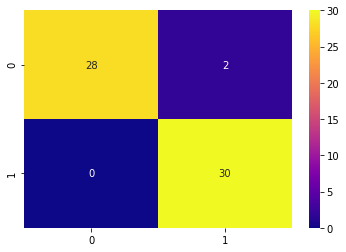

In [79]:
sns.heatmap(cn,cmap="plasma",annot=True) #0: Covid ; 1: Normal
plt.autoscale(enable=True, axis='y')